<a href="https://colab.research.google.com/github/riffatahmad/Time-Series/blob/master/Furniture_Sales_Prediction(Time_Series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fbprophet import Prophet

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
from google.colab import files
uploaded = files.upload()

Saving sales.xls to sales.xls


In [8]:
import io
df = pd.read_excel(io.BytesIO(uploaded['sales.xls']))

#df=pd.read_excel('sales.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [0]:
furniture = df.loc[df['Category'] == 'Furniture']

In [0]:
furniture= furniture[['Order Date', 'Sales']]

In [0]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [0]:
# Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month 
# instead, and we are using the start of each month as the timestamp.

y = furniture['Sales'].resample('MS').mean()

In [14]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

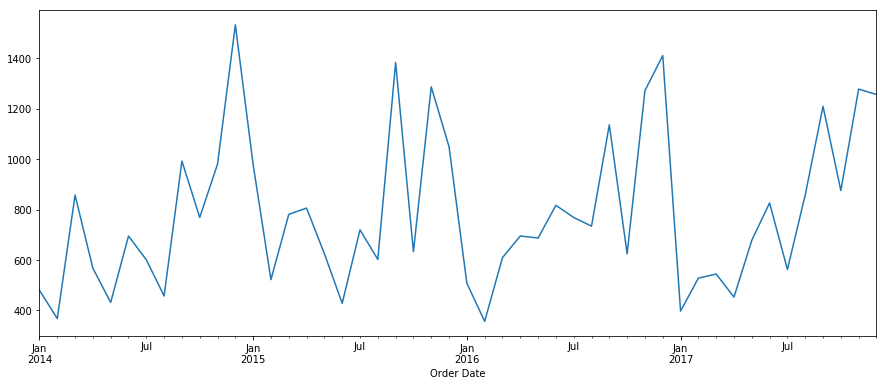

In [15]:
y.plot(figsize=(15, 6))
plt.show()

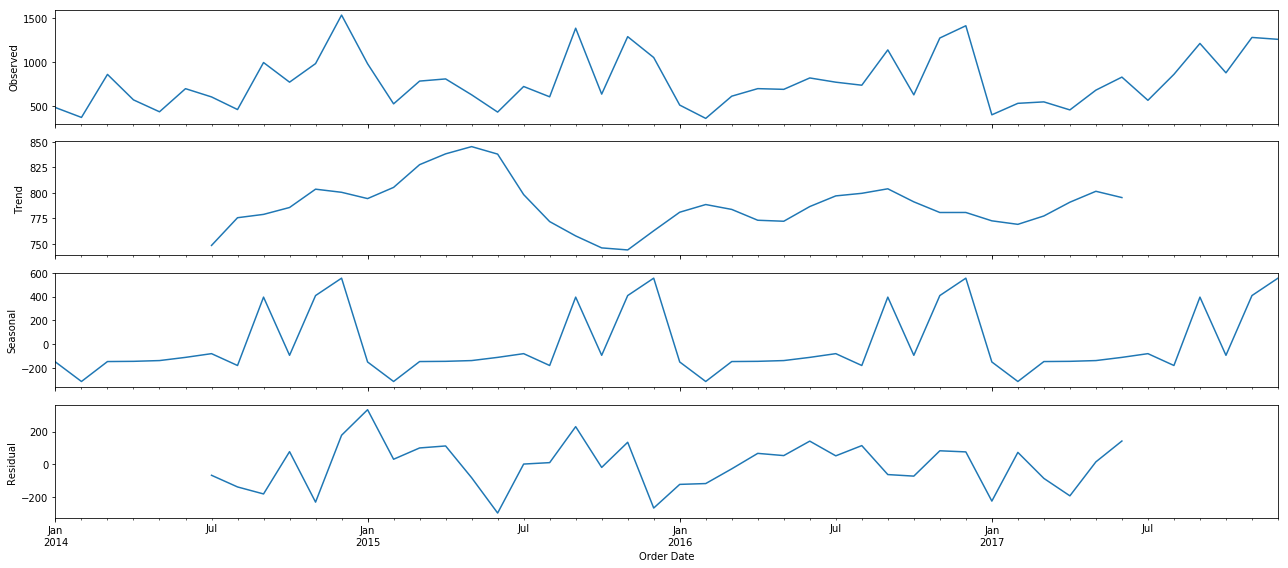

In [16]:
# We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series 
# into three distinct components: trend, seasonality, and noise.

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
import itertools

In [18]:
# SARIMA(p,d,q)(P,D,Q)m  ..............


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q)) # cartesian product
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1478.4829845115771
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1284.058367274109
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758101
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3151.7661575378966
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.58288234908053
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:354243.3332148463
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946871
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766859465


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1337.3478246551238
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671879367
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1288.7471922943844
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817185
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2720.375037566438
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482636
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427485
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2580.4648793520846
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.757436841719
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1384.324523349358
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935196


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1480.5365328669084
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750846014
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185792
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:82127.29509766627
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958141426
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876977
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:15008.560980242759
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002152007
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1222.3294534285433
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784892
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1990.3094063453434
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345398
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835073
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2583.6576862754373
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610653
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608216
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3121.0642337973254
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395408083


The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

Fitting the ARIMA model

In [20]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


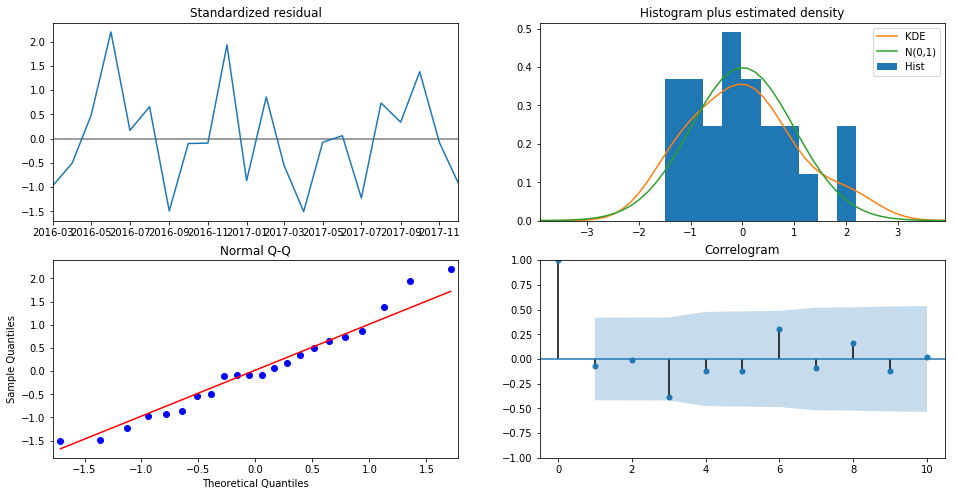

In [21]:
# We should always run model diagnostics to investigate any unusual behavior.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
#our model diagnostics suggests that the model residuals are near normally distributed.

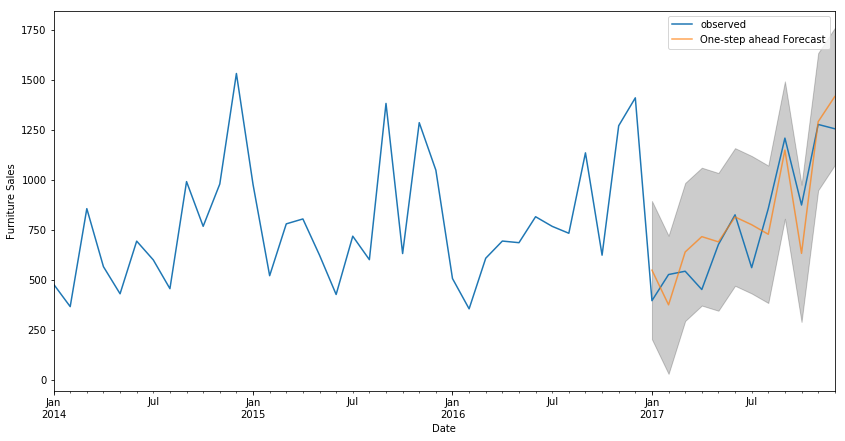

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.57


In [26]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


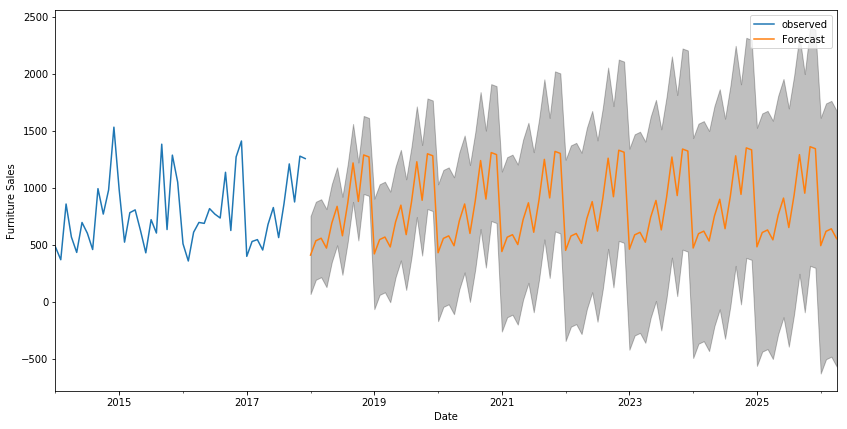

In [27]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Time Series Modeling with Prophet

In [0]:
from fbprophet import Prophet

In [0]:
furniture= furniture.reset_index()

In [38]:
print(furniture.columns)

Index(['Order Date', 'y'], dtype='object')


In [0]:
print(furniture.head())

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

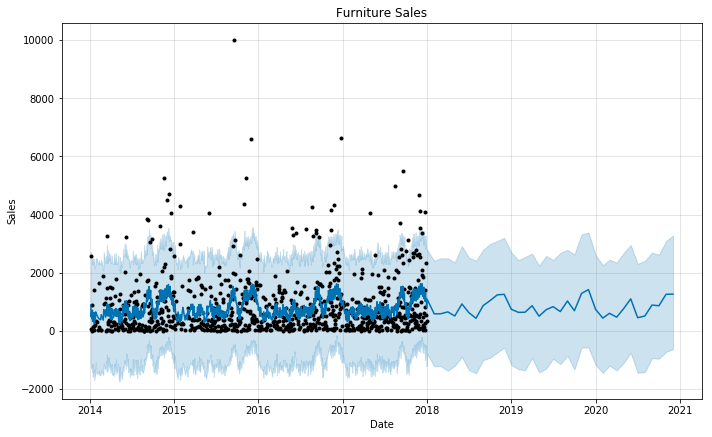

In [39]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [48]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
forecast = furniture_forecast.copy()
forecast.columns = furniture_names
forecast = forecast.rename(columns={'furniture_ds': 'Date'})
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_weekly,furniture_weekly_lower,furniture_weekly_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat
0,2014-01-06,735.920799,-1027.824907,2713.662268,735.920799,735.920799,154.502656,154.502656,154.502656,234.454040,234.454040,234.454040,-79.951385,-79.951385,-79.951385,0.0,0.0,0.0,890.423455
1,2014-01-07,735.956830,-1277.830083,2299.524720,735.956830,735.956830,-248.272288,-248.272288,-248.272288,-139.720386,-139.720386,-139.720386,-108.551902,-108.551902,-108.551902,0.0,0.0,0.0,487.684542
2,2014-01-10,736.064922,-1246.887479,2483.372741,736.064922,736.064922,-95.378320,-95.378320,-95.378320,93.294657,93.294657,93.294657,-188.672978,-188.672978,-188.672978,0.0,0.0,0.0,640.686602
3,2014-01-11,736.100953,-1411.059599,2405.127693,736.100953,736.100953,-326.652421,-326.652421,-326.652421,-113.719717,-113.719717,-113.719717,-212.932704,-212.932704,-212.932704,0.0,0.0,0.0,409.448532
4,2014-01-13,736.173014,-1144.864389,2527.492102,736.173014,736.173014,-22.284424,-22.284424,-22.284424,234.454040,234.454040,234.454040,-256.738465,-256.738465,-256.738465,0.0,0.0,0.0,713.888590


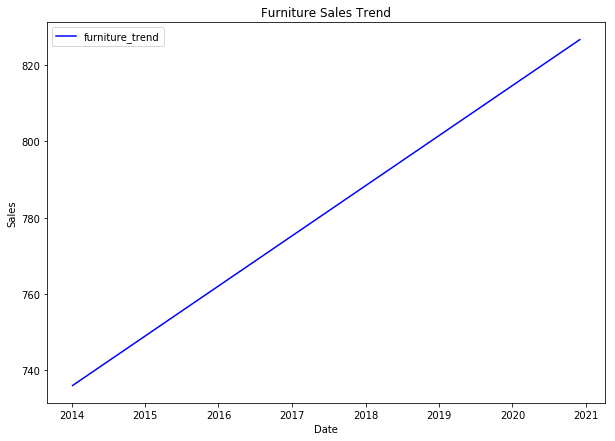

In [49]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture Sales Trend');

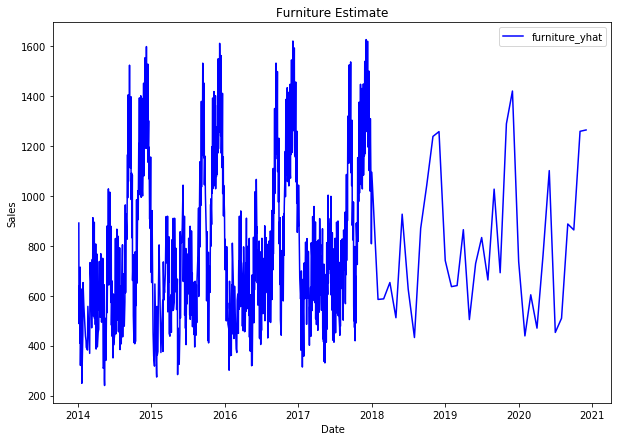

In [50]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture Estimate');

Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

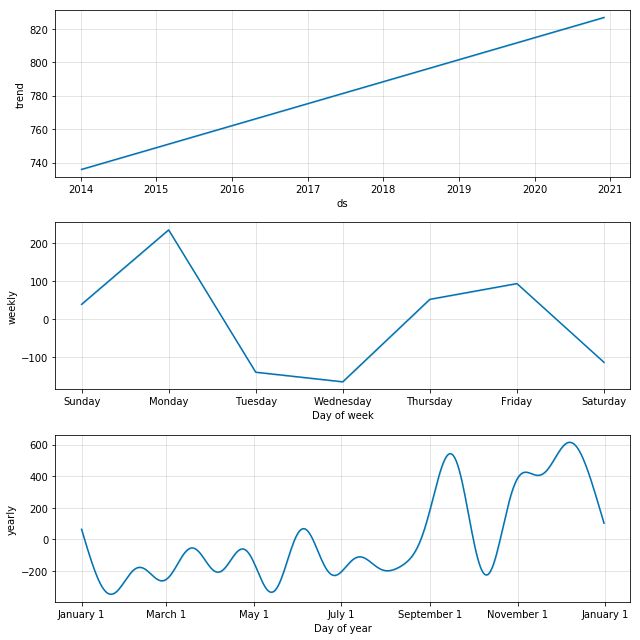

In [51]:
furniture_model.plot_components(furniture_forecast);

Good to see that the sales for furniture has been linearly increasing over time and will keep growing.

The worst month for furniture sales is February. The best month for furniture sales is December